# OLS Regression
### Key Tasks:
    - Merge the Data
    - Exploratory Data Analysis
    - Perform Regression Analysis
    - Analysis
    - Recommendations

### Importing Packages

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro

### Task 1: Merge the Dataset

- Using Python: Merge the demographic_detail.csv with the roster_with_score.csv data. Be sure to use the employee_id as the key. Save the resulting data frame as a new CSV: roster_with_score_2.csv.

- **Code Explanation:**
1. **demographic = pd.read_csv('E:\\Kate Projects\\01_OLS_Regression\\demographic_detail.csv')**:
   - Reads the CSV file 'demographic_detail.csv' located at the specified file path using Pandas (**pd** is an alias for Pandas).
   - Stores the data in a DataFrame named 'demographic'.

2. **roster_with_score = pd.read_csv("E:\\Kate Projects\\01_OLS_Regression\\roster_with_score.csv")**:
   - Reads the CSV file 'roster_with_score.csv' located at the specified file path.
   - Stores the data in a DataFrame named 'roster_with_score'.

3. **merged_df = pd.merge(roster_with_score, demographic, on='employee_id')**:
   - Performs a merge operation on the 'roster_with_score' and 'demographic' DataFrames.
   - The merging is based on the common column 'employee_id'.
   - The result is a new DataFrame named 'merged_df' containing columns from both original DataFrames.

4. **merged_df.to_csv('roster_with_score_2.csv')**:
   - Saves the merged DataFrame 'merged_df' to a new CSV file named 'roster_with_score_2.csv'.
   - This line exports the combined data into a new CSV file for further use or analysis.

In [7]:
demographic = pd.read_csv('E:\\Kate Projects\\01_OLS_Regression\\demographic_detail.csv')
roster_with_score = pd.read_csv("E:\\Kate Projects\\01_OLS_Regression\\roster_with_score.csv")
merged_df = pd.merge(roster_with_score,demographic,on='employee_id')
merged_df.to_csv('roster_with_score_2.csv')

- Reading roster_with_score_2.csv

- **Code Explanation:**
1. **roster_with_score_2 = pd.read_csv("roster_with_score_2.csv")**:
   - Reads the CSV file 'roster_with_score_2.csv' and creates a DataFrame named 'roster_with_score_2'.

2. **roster_with_score_2 = roster_with_score_2.drop(columns=['Unnamed: 0','Unnamed: 0_x', 'Unnamed: 0_y'])**:
   - Drops the specified columns ('Unnamed: 0','Unnamed: 0_x', 'Unnamed: 0_y') from the 'roster_with_score_2' DataFrame.
   - Modifies the DataFrame in place.

3. **df_sorted = roster_with_score_2.sort_values(by="employee_id", ascending=True)**:
   - Sorts the 'roster_with_score_2' DataFrame based on the 'employee_id' column in ascending order.
   - Creates a new DataFrame named 'df_sorted' with the sorted results.

4. **df_sorted.head()**:
   - Displays the first few rows of the sorted DataFrame 'df_sorted'.
   - This allows you to inspect the sorted data to ensure it meets your expectations.

In [17]:
roster_with_score_2 = pd.read_csv("roster_with_score_2.csv")
roster_with_score_2 = roster_with_score_2.drop(columns=['Unnamed: 0','Unnamed: 0_x', 'Unnamed: 0_y'])
df_sorted = roster_with_score_2.sort_values(by="employee_id",ascending=True)
df_sorted.head()

,employee_id,title,last,first,manager_id,function,department,location,age,sex,...,tenure,tenure_id,alignment,development,enablement,engagement,leadership,overall,year_of_birth,time_on_the_job
323,4,Senior Underwriter,Deleon,Josephine,44.0,Finance & Admin,Underwriting,"Mountain View, CA",25 - 34,F,...,4 to less than 6 years,4,0.933333,0.933333,0.933333,0.80,0.933333,0.906667,1995,72
379,7,Senior Underwriter,Bailey,Kristopher,458.0,Finance & Admin,Underwriting,"Mountain View, CA",25 - 34,M,...,4 to less than 6 years,4,0.866667,0.933333,1.000000,0.92,0.933333,0.930667,1988,71
73,10,Loan Officer,Scott,Iris,201.0,Loan Operations,East Coast Lending,"New York, NY",18 - 24,F,...,4 to less than 6 years,4,0.933333,0.800000,0.933333,0.88,1.000000,0.909333,2001,71
2,11,VP Engineering,Xiong,Steven,343.0,CEO,Engineering,"Mountain View, CA",35 - 44,M,...,4 to less than 6 years,4,0.933333,0.866667,1.000000,0.84,1.000000,0.928000,1983,70
19,14,Engineer,Nguyen,Terri,68.0,Engineering,Back End,"Mountain View, CA",45 - 54,F,...,4 to less than 6 years,4,0.866667,0.733333,1.000000,0.80,0.933333,0.866667,1971,70


### Task 2: Exploratory Data Analysis


- Visualize the data to prepare for exploratory analysis by using the sns.regplot method.

- **Code Explanation:**
1. **Import Libraries:**
   Import the necessary Python libraries for data visualization using Seaborn and Matplotlib:
 

2. **Create Regression Plot:**
   Use Seaborn's `regplot` function to create a scatter plot with a linear regression line. The data for the plot is sourced from the DataFrame `df_sorted`, and the x-axis and y-axis variables are set to 'time_on_the_job' and 'overall', respectively.
  
3. **Set Title and Axes Labels:**
   Set the title of the plot and label the x and y axes for better interpretation:

4. **Display the Plot:**
   Use Matplotlib's `show` function to display the generated plot:
   This code snippet aims to visualize and understand the relationship between the 'Time on the Job' and 'Overall Performance' variables in the DataFrame `df_sorted`.

Text(0, 0.5, 'Overall Performance')

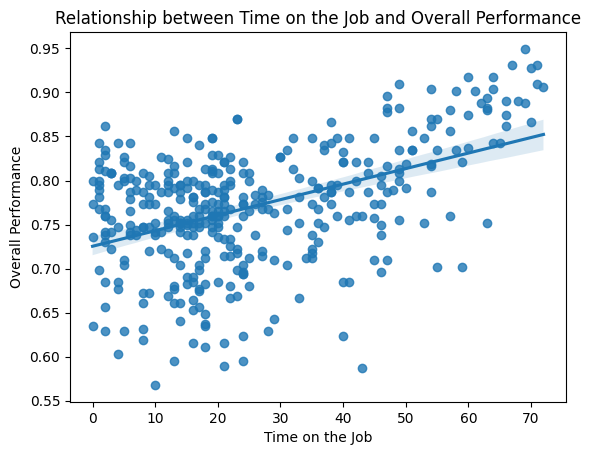

In [18]:
sns.regplot(data=df_sorted,x=roster_with_score_2['time_on_the_job'],y=roster_with_score_2['overall'])
plt.title('Relationship between Time on the Job and Overall Performance')
plt.xlabel('Time on the Job')
plt.ylabel('Overall Performance')

- Compute the correaltion coefficients of 'overall' employee results (an average of all of the results) compared with each oh the two new vairables.
- **Code Explanation:**
1. **Calculate Average Overall Performance:**
   **avg_overall = df_sorted['overall'].mean()**
   - Computes the mean (average) value of the 'overall' column in the DataFrame 'df_sorted'.
   - Stores the result in the variable 'avg_overall'.

2. **Select Relevant Columns for Correlation Analysis:**
   **corr_data = df_sorted[['overall','time_on_the_job','tenure_id']]**
   - Creates a new DataFrame 'corr_data' by selecting specific columns ('overall', 'time_on_the_job', and 'tenure_id') from 'df_sorted'.
   - This subset of data will be used for correlation analysis.

3. **Calculate Correlation Matrix:**
   **corr_mat = corr_data.corr()**
   - Computes the correlation matrix for the selected columns in 'corr_data'.
   - The correlation matrix represents the pairwise correlation coefficients between variables.

4. **Visualize Correlation Matrix with Heatmap:**
   **sns.heatmap(corr_mat, annot=True)**
   - Creates a heatmap using Seaborn (sns) to visually represent the correlation matrix.
   - The 'annot=True' parameter adds the correlation coefficients to the heatmap.

5. **Set Title for the Heatmap:**
   **plt.title("Overall Coff Compared with Time on the Job & Tenure ID")**
   - Sets the title for the heatmap plot to describe the relationship being visualized.

Text(0.5, 1.0, 'Overall Coff Compared with Time on the Job & Tenure ID')

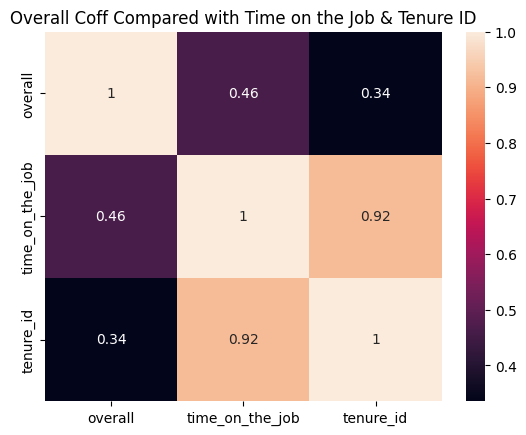

In [19]:
avg_overall = df_sorted['overall'].mean()
corr_data = df_sorted[['overall','time_on_the_job','tenure_id']]
corr_mat = corr_data.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Overall Coff Compared with Time on the Job & Tenure ID")

### Task 3: Perform Regression Analysis:
- You can perform the simple OLS regression of overall satisfaction compared with each of the variables available in the new dataset. Note that you will need to perform two univariate regressions. Using the statsmodels OLS regression package, perform an OLS regression, and use the 'summary' output to produce metrics to assess the quality of the regression and of the regressor coeeficients.

- **Code Explanation:**

**1. Create Design Matrix for 'time_on_the_job':**
**X_time_on_the_job = sm.add_constant(df_sorted['time_on_the_job'])**
- Adds a constant term to the 'time_on_the_job' column in the 'df_sorted' DataFrame.
- The constant is necessary for the Ordinary Least Squares (OLS) regression model.
- The result is stored in the variable 'X_time_on_the_job'.

**2. Define Dependent Variable 'overall':**
**y_overall = df_sorted['overall']**
- Creates a variable 'y_overall' representing the dependent variable, which is the 'overall' column in the 'df_sorted' DataFrame.

**3. Fit OLS Regression Model for 'time_on_the_job':**
**model_time_on_the_job = sm.OLS(y_overall, X_time_on_the_job).fit()**
- Uses the OLS method from the statsmodels library to fit a linear regression model.
- The dependent variable is 'y_overall', and the independent variable is 'X_time_on_the_job'.
- The result is stored in the variable 'model_time_on_the_job'.

**4. Create Design Matrix for 'tenure_id':**
**X_tenure_id = sm.add_constant(df_sorted['tenure_id'])**
- Adds a constant term to the 'tenure_id' column in the 'df_sorted' DataFrame.
- Similar to the process for 'time_on_the_job'.
- The result is stored in the variable 'X_tenure_id'.

**5. Fit OLS Regression Model for 'tenure_id':**
**model_tenure_id = sm.OLS(y_overall, X_tenure_id).fit()**
- Fits another OLS regression model, this time using 'tenure_id' as the independent variable.
- The result is stored in the variable 'model_tenure_id'.

In [28]:
X_time_on_the_job = sm.add_constant(df_sorted['time_on_the_job'])
y_overall = df_sorted['overall']
model_time_on_the_job = sm.OLS(y_overall,X_time_on_the_job).fit()

X_tenure_id = sm.add_constant(df_sorted['tenure_id'])
model_tenure_id = sm.OLS(y_overall,X_tenure_id).fit()

Summary of model_time_on_the_job:

In [29]:
print("Regression Summary for 'time_on_the_job':")
print(model_time_on_the_job.summary())

Regression Summary for 'time_on_the_job':
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.20e-21
Time:                        12:27:27   Log-Likelihood:                 523.55
No. Observations:                 381   AIC:                            -1043.
Df Residuals:                     379   BIC:                            -1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------


Summary of model_tenure_id:

In [31]:
print("\nRegression Summary for 'tenure_id':")
print(model_tenure_id.summary())


Regression Summary for 'tenure_id':
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     48.22
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.66e-11
Time:                        12:28:08   Log-Likelihood:                 500.39
No. Observations:                 381   AIC:                            -996.8
Df Residuals:                     379   BIC:                            -988.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

### Task 4: Analysis
- Determine which of the two regressions produces better results. Be sure to explain the metric(s) you are uisng to make the determination.

- Inspect the residuals of the two regressions and describe your observations,
    - Are the residuals normally distributed?
    - Do you notice any significant outlires?
    - Do you observe anything else of concer?

### Model Time on The Job
- `Observations:` Residuals vs Fitted line the data has speadout normally there is no Non-linear data and Data is normally distributed. But there are some Outliers that we could see, Because the data points that we could see those points are not near to 0.00. We may we like to remove. Q-Q Plot the points closely follow a straight line, it suggests that the residuals are approximately normally distributed. This is a good indication that the assumption of normality is met.

- **Code Explanation:**
**1. Compute Residuals for 'time_on_the_job':**
**residuals_time_on_the_job = model_time_on_the_job.resid
**- Calculates the residuals (errors) by subtracting the predicted values from the actual values.
- These residuals represent the differences between the observed and predicted 'overall' scores.

**2. Create Scatter Plot of Residuals vs Fitted Values:**
**plt.figure(figsize=(12, 6))
sns.scatterplot(x=model_time_on_the_job.fittedvalues, y=residuals_time_on_the_job)plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Fitted values')**
- Generates a scatter plot to visualize the relationship between fitted values and residuals.
- The red dashed line at y=0 represents the ideal scenario where residuals are centered around zero.

**3. Q-Q Plot for Residuals:**
**sm.qqplot(residuals_time_on_the_job, line='s')**
**plt.title('Q-Q plot')**
- Creates a quantile-quantile (Q-Q) plot to assess the normality of the residuals.
- The 'line='s'' argument indicates that a standardized line will be added to the plot.

**4. Display the Plots:**
**plt.show()**
- Shows the generated plots.

**5. Shapiro-Wilk Test for Normality:**

**stat, p_value = shapiro(residuals_time_on_the_job)**
**print(f"Shapiro-Wilk Test for 'time_on_the_job' Residuals: p-value = {p_value}")**
- Performs the Shapiro-Wilk test to formally test the normality of residuals.
- Prints the p-value obtained from the test.

These visualizations and statistical tests help assess the assumptions of the regression model, such as the normality of residuals and the homoscedasticity of errors.

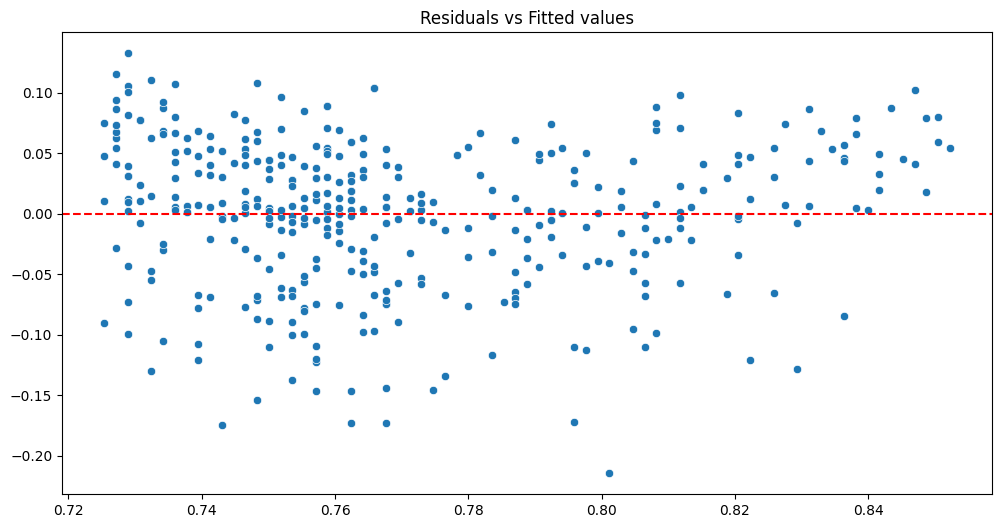

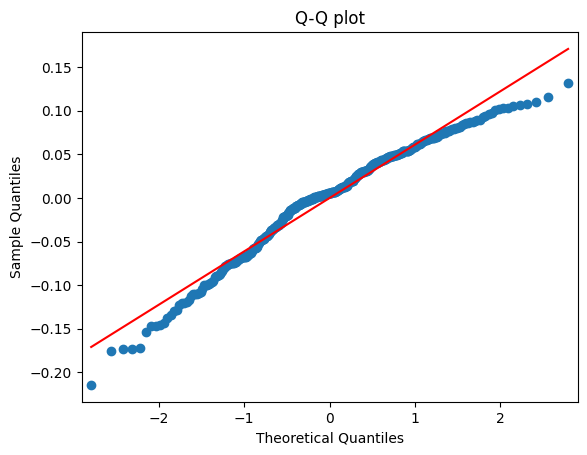

Shapiro-Wilk Test for 'time_on_the_job' Residuals: p-value = 4.1365865399711765e-07


In [40]:
residuals_time_on_the_job = model_time_on_the_job.resid
plt.figure(figsize=(12, 6))


sns.scatterplot(x=model_time_on_the_job.fittedvalues, y=residuals_time_on_the_job)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Fitted values')
sm.qqplot(residuals_time_on_the_job, line='s')
plt.title('Q-Q plot')

plt.show()
stat, p_value = shapiro(residuals_time_on_the_job)
print(f"Shapiro-Wilk Test for 'time_on_the_job' Residuals: p-value = {p_value}")


### Model Tenure Id
- `Observations:` Residual vs Fitted values describe that the data has calculated may belongs to categorical values it means that the constant for the Tenure Id may categorical that is why the Residual that has fitted shows a straight line in the Plot. Q-Q plot as shown above this plot follows the straight line as shown above which we could consider as a better fit.

- **Code Explanation:**

**1. Compute Residuals for 'tenure_id':**

residuals_tenure_id = model_tenure_id.resid

- Calculates the residuals (errors) by subtracting the predicted values from the actual values using the 'model_tenure_id' OLS regression model.
- These residuals represent the differences between the observed and predicted 'overall' scores.

**2. Create Scatter Plot of Residuals vs Fitted Values:**

plt.figure(figsize=(12, 6))
sns.scatterplot(x=model_tenure_id.fittedvalues, y=residuals_tenure_id)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Fitted values')

- Generates a scatter plot to visualize the relationship between fitted values and residuals for the 'tenure_id' variable.
- The red dashed line at y=0 represents the ideal scenario where residuals are centered around zero.

**3. Q-Q Plot for Residuals:**

sm.qqplot(residuals_tenure_id, line='s')
plt.title('Q-Q plot')

- Creates a quantile-quantile (Q-Q) plot to assess the normality of the residuals for the 'tenure_id' variable.
- The 'line='s'' argument indicates that a standardized line will be added to the plot.

**4. Display the Plots:**

plt.show()

- Shows the generated plots.

**5. Shapiro-Wilk Test for Normality:**

stat, p_value = shapiro(residuals_tenure_id)
print(f"Shapiro-Wilk Test for 'tenure_id' Residuals: p-value = {p_value}")

- Performs the Shapiro-Wilk test to formally test the normality of residuals for the 'tenure_id' variable.
- Prints the p-value obtained from the test.

These visualizations and statistical tests help assess the assumptions of the regression model for the 'tenure_id' variable, including the normality of residuals and the homoscedasticity of errors.

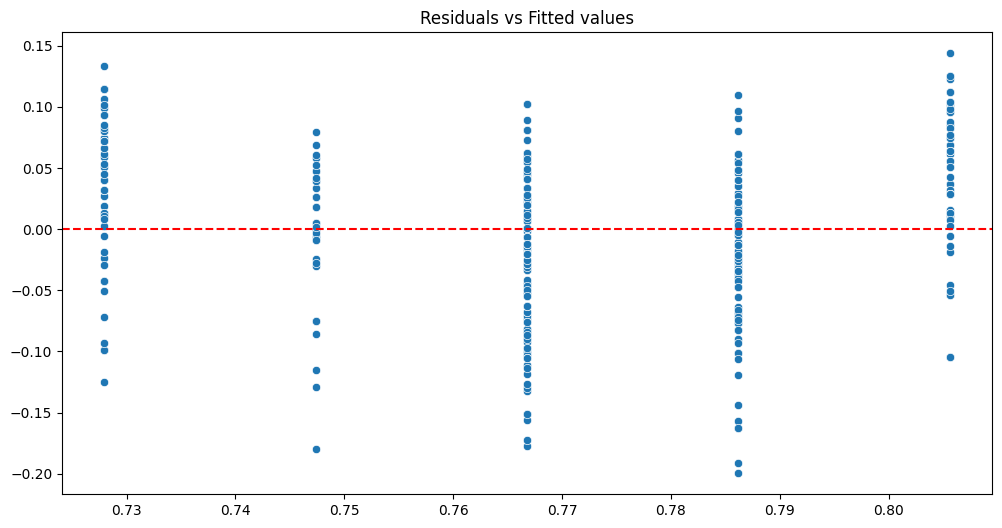

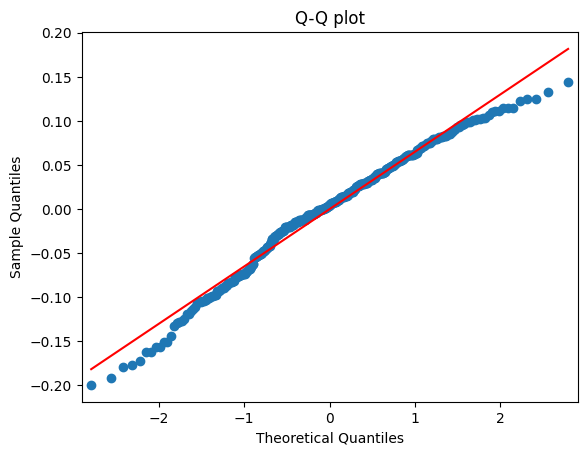

Shapiro-Wilk Test for 'tenure_id' Residuals: p-value = 5.440392124000937e-05


In [39]:
residuals_tenure_id = model_tenure_id.resid
plt.figure(figsize=(12, 6))

sns.scatterplot(x=model_tenure_id.fittedvalues, y=residuals_tenure_id)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Fitted values')

sm.qqplot(residuals_tenure_id, line='s')
plt.title('Q-Q plot')

plt.show()
stat, p_value = shapiro(residuals_tenure_id)
print(f"Shapiro-Wilk Test for 'tenure_id' Residuals: p-value = {p_value}")


### Task 5: Recommendations:

### Interpred the data to determine any relationships that might be present. Is there a relationship between the age of employees and theri satisfaction surver results? What about job tenure?

- `Observatios:`
From the information provided, let's summarize the key findings:

### Regression Analyses:

#### 1. Time on the Job:
- **Coefficient for 'time_on_the_job':** 0.0018
- **R-squared:** 0.214
- **p-value (Shapiro-Wilk Test for Residuals):** 4.14e-07

#### 2. Tenure ID:
- **Coefficient for 'tenure_id':** 0.0194
- **R-squared:** 0.113
- **p-value (Shapiro-Wilk Test for Residuals):** 5.44e-05

#### 3. Age Categories:
- **Coefficients for age categories:**
  - age_18 - 24: 0.1093
  - age_25 - 34: 0.1288
  - age_35 - 44: 0.1324 (Reference Category)
  - age_45 - 54: 0.1237
  - age_55 - 64: 0.1190
  - age_65+: 0.0318
- **R-squared:** 0.035
- **p-value (Shapiro-Wilk Test for Residuals):** (Not provided in the output)

### Observations:

1. **Time on the Job:**
   - A small positive coefficient suggests a positive relationship between time on the job and overall satisfaction.
   - The model explains 21.4% of the variance in overall satisfaction.

2. **Tenure ID:**
   - A small positive coefficient suggests a positive relationship between tenure and overall satisfaction.
   - The model explains 11.3% of the variance in overall satisfaction.

3. **Age Categories:**
   - Each age category has a positive coefficient compared to the reference category ('age_35 - 44').
   - The model explains a small amount of the variance (3.5%) in overall satisfaction based on age categories.

### Residual Analysis:

- **Shapiro-Wilk Test:**
  - The p-values for both 'time_on_the_job' and 'tenure_id' residuals are very low, indicating that the residuals are not normally distributed.
  - This suggests potential violations of the normality assumption.

### Conclusion:

- The models for 'time_on_the_job' and 'tenure_id' explain a moderate and low amount of variance, respectively.
- The age category model has a small explanatory power and indicates a positive relationship for each age category compared to the reference category.

### Recommendations:

- Consider checking for multicollinearity between independent variables.
- Assess the assumption of normality in the residuals, and explore potential transformations or alternative models if needed.

**Code Explanation:**
**1. Create Dummy Variables for 'age':**
   - Generate dummy variables for the 'age' column, creating a new DataFrame (`age_dummies`) with columns prefixed by 'age'.

**2. Concatenate Dummy Variables with Original DataFrame:**
   - Combine the original DataFrame (`df_sorted`) with the newly created dummy variables DataFrame (`age_dummies`).
   - The result is stored in a new DataFrame named `df_with_dummies`.

**3. Prepare the Independent Variables and Dependent Variable:**
   - Create a matrix of independent variables (`X_age_categories`) by adding a constant term and selecting the dummy variable columns from `df_with_dummies`.
   - The dependent variable (`y_overall`) is set to the 'overall' column in `df_with_dummies`.

**4. Fit Ordinary Least Squares (OLS) Regression Model:**
   - Fit an OLS regression model (`model_age_categories`) using the independent and dependent variables prepared in the previous step.

**5. Obtain Coefficients:**
   - Retrieve the coefficients of the regression model for each age category.
   - Print and display the coefficients.

**6. Display Regression Summary:**
   - Print and display the summary statistics of the OLS regression model using `model_age_categories.summary()`.
   - This includes information such as R-squared, coefficients, p-values, and other relevant metrics for assessing the quality of the regression.

These steps illustrate the process of creating dummy variables for age categories, fitting an OLS regression model, and analyzing the coefficients and summary statistics related to age categories' impact on overall performance.

In [50]:
age_dummies = pd.get_dummies(df_sorted['age'],prefix='age')
df_with_dummies = pd.concat([df_sorted,age_dummies],axis=1)
X_age_categories = sm.add_constant(df_with_dummies[['age_18 - 24', 'age_25 - 34', 'age_35 - 44', 'age_45 - 54', 'age_55 - 64', 'age_65+']])
y_overall = df_with_dummies['overall']
model_age_categories = sm.OLS(y_overall, X_age_categories).fit()
coeff_age_categories = model_age_categories.params
print("Coefficients for age categories:")
print(coeff_age_categories)
print(model_age_categories.summary())

Coefficients for age categories:
const          0.644986
age_18 - 24    0.109300
age_25 - 34    0.128755
age_35 - 44    0.132366
age_45 - 54    0.123704
age_55 - 64    0.119048
age_65+        0.031814
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.682
Date:                Fri, 02 Feb 2024   Prob (F-statistic):             0.0213
Time:                        13:01:22   Log-Likelihood:                 484.27
No. Observations:                 381   AIC:                            -956.5
Df Residuals:                     375   BIC:                            -932.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                    

### Recommend actions, based on your interpretations, that the client can take to improve employee satisfaction.
Based on the analysis, here are some recommendations for improving employee satisfaction:

1. **Time on the Job:**
   - As there is a positive relationship between time on the job and overall satisfaction, consider implementing programs or initiatives to support long-term employee retention.
   - Recognize and reward employees for their tenure to enhance job satisfaction.

2. **Tenure:**
   - Similar to time on the job, recognize and appreciate employees based on their tenure to foster a positive work environment.
   - Provide professional development opportunities to ensure employees feel valued and invested in their growth within the organization.

3. **Age Categories:**
   - Acknowledge and celebrate the diversity in age groups within the organization.
   - Tailor employee engagement programs to address the unique needs and preferences of different age categories.
   - Foster a culture of inclusivity and collaboration among employees of all age groups.

4. **Residual Analysis:**
   - Given the potential deviations from normality in residuals, consider investigating the factors contributing to these deviations.
   - Explore additional employee feedback mechanisms, such as surveys or focus groups, to gain deeper insights into specific areas of concern.